In [132]:
# importando as bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.optimize import curve_fit

In [86]:
# lendo o Dataset cars e quando em um DataFrame
df_cars = pd.read_csv('D:\Python\Bootcamp_IGTI\Desafio Final\Dataset\cars.csv')
df_cars_ori = pd.read_csv('D:\Python\Bootcamp_IGTI\Desafio Final\Dataset\cars.csv')

In [87]:
# avaliando a estrutura do dataframe
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [88]:
# consultando as 10 primeiras linhas do dataframe
df_cars.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.
6,13.0,8,351,158,4363,13,1974,US.
7,14.0,8,440,215,4312,9,1971,US.
8,25.4,5,183,77,3530,20,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


In [89]:
# transformando as colunas cubicinches e weightlbs para numerico
df_cars['cubicinches'] = pd.to_numeric(df_cars['cubicinches'], errors='coerce')
df_cars['weightlbs'] = pd.to_numeric(df_cars['weightlbs'], errors='coerce')

In [90]:
# avaliando a estrutura do dataframe
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [91]:
# consultando as 10 primeiras linhas do dataframe
df_cars.head(10)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.
5,23.0,8,350.0,125,3900.0,17,1980,US.
6,13.0,8,351.0,158,4363.0,13,1974,US.
7,14.0,8,440.0,215,4312.0,9,1971,US.
8,25.4,5,183.0,77,3530.0,20,1980,Europe.
9,37.7,4,89.0,62,2050.0,17,1982,Japan.


In [92]:
# verificando os indices dos valores que forcaram o pandas a marcar string para a coluna cubicinches
df_cars_ori[df_cars_ori['cubicinches'] == ' ']

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,,105,3897,19,1976,US.
180,19.8,6,,85,2990,18,1980,US.


In [93]:
# substituindo os valores nulos pela média da coluna
df_cars.update(df_cars['cubicinches'].fillna(df_cars['cubicinches'].mean()))
df_cars.update(df_cars['weightlbs'].fillna(df_cars['weightlbs'].mean()))

In [94]:
# verificando o valor médio da coluna weightlbs
df_cars['weightlbs'].mean()

3009.8333333333335

In [95]:
# verificando o mediana do atributo MPG
df_cars['mpg'].median()

22.0

In [96]:
# avaliando a variavel time-to-60
print(df_cars['time-to-60'].describe())
print(df_cars[df_cars['time-to-60'] == 14].count()) # 27 instancias com valor igual a 14
print(df_cars[df_cars['time-to-60'] > 14].count()) # 172 instancias com valor superior a 14
print(172/261)

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64
mpg            27
cylinders      27
cubicinches    27
hp             27
weightlbs      27
time-to-60     27
year           27
brand          27
dtype: int64
mpg            172
cylinders      172
cubicinches    172
hp             172
weightlbs      172
time-to-60     172
year           172
brand          172
dtype: int64
0.6590038314176245


cylinders      mpg
cylinders    1.00000 -0.77671
mpg         -0.77671  1.00000


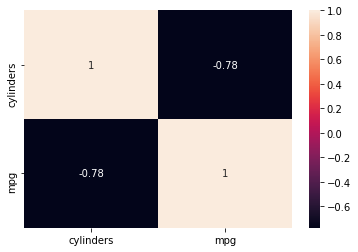

In [97]:
# verificando a correlação das variaveis
# matriz de correlação
print(df_cars[["cylinders", "mpg"]].corr())

# plot da matrix de correlação
corr = df_cars[["cylinders", "mpg"]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 
plt.show()

In [98]:
# calculando o coeficiente de determinação (r2) para as variveis cylinders e mpg
xData = np.array(df_cars['cylinders']) # transformando a lista idade em um array
yData = np.array(df_cars['mpg']) # transformando a lista salarioAnual em array

# Define função para ser otimizada (regressão linear)
def equacaoLinear(x, a, b):
    return a * x + b

# gera parametros iniciais para o otimizador
parametrosIniciais = np.array([1.0, 1.0])

# realiza a otimização atraves do erro médio quadrado (MSE)
# parametrosOtimizados - contém as parametros de ajuste da curva
# pcov - contem a covariancia dos parametros encontrados
parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData, parametrosIniciais)

# realiza a previsão dos dados atraves do modelo (constroi a equação linear)
previsaoModelo = equacaoLinear(xData, * parametrosOtimizados)

# encontra o erro absoluto (linhas verticais)
erroAbsoluto = previsaoModelo - yData

# realiza o calculo do coeficiente de determinação (R Quadrado)
Rsquared = 1.0 - (np.var(erroAbsoluto) / np.var(yData))
print('Coeficiente de Determinação', Rsquared)

Coeficiente de Determinação 0.6032782423312326


count    261.000000
mean     106.360153
std       40.499959
min       46.000000
25%       75.000000
50%       95.000000
75%      138.000000
max      230.000000
Name: hp, dtype: float64


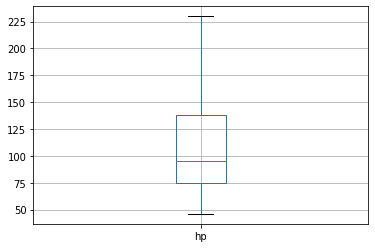

In [99]:
# plotando o boxplot para variavel HP
df_cars[['hp']].boxplot()
print(df_cars['hp'].describe())

In [114]:
# separando as coluna para aplicar os modelos
df_cars_train = df_cars[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]

In [115]:
# normalizando os dados da coluna HP com StandardScaler
cols = df_cars_train.columns
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_cars_train)
df_cars_norm = pd.DataFrame(x_scaled, columns = cols)
print('Maior valor após normalizar', df_cars_norm['hp'].max())

Maior valor após normalizar 3.05870398977614


In [117]:
# aplicando o PCA
pca =  PCA(n_components = 7)
df_cars_norm = pca.fit_transform(df_cars_norm)
df_cars_norm = pd.DataFrame(df_cars_norm, columns = cols)
print(pca.explained_variance_ratio_[0])

0.7237134885896339


In [119]:
# Aplicado o K-means
km = KMeans(n_clusters = 3, random_state = 42)
clusters = km.fit_predict(df_cars_norm)
print(km.cluster_centers_)
print(pd.Series(clusters).value_counts())

[[-2.21903474e-01  3.35880334e-01  2.83961966e-01 -2.67686215e-01
  -5.45225710e-02 -4.15058549e-03  6.49104031e-03]
 [-2.21966813e+00 -1.65114484e-01 -1.97903173e-01  1.41526756e-01
   5.21847434e-02 -6.14922939e-03 -2.61748230e-02]
 [ 3.08082252e+00 -1.98389792e-01 -9.38631667e-02  1.45525382e-01
   5.33778892e-05  1.28250676e-02  2.52789802e-02]]
1    95
0    91
2    75
dtype: int64


In [142]:
# definindo se um carro é eficiente para usar como target nos modelos
Y = np.where(df_cars['mpg'] > 25, 1, 0)
X = df_cars_norm[['mpg', 'cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']]

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [144]:
# aplicando o modelo Arvore de Descisão
clf_arvore = DecisionTreeClassifier(random_state = 42)
clf_arvore.fit(x_train, y_train)

# realizando a previsão
y_pred = clf_arvore.predict(x_test)

# verificando a acuracia do modelo
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9493670886075949
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.95      0.95      0.95        38

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



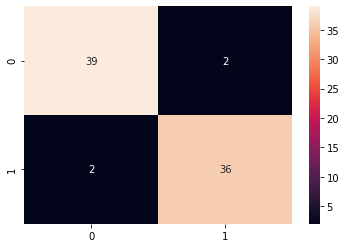

In [145]:
# plotando a matrix de confusão da Arvores de Descisão
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [146]:
# APlicando a regressão logistica
clf_regressao_log = LogisticRegression(random_state = 42)
clf_regressao_log.fit(x_train, y_train)

# realizando a previsão
y_pred = clf_regressao_log.predict(x_test)

# verificando a acuracia do modelo
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9746835443037974
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.97      0.97      0.97        38

    accuracy                           0.97        79
   macro avg       0.97      0.97      0.97        79
weighted avg       0.97      0.97      0.97        79

